In [1]:
import os
import sys
import seaborn as sns
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from evaluation.utils import entropy_batch_mixing, knn_purity, nmi, asw_c, asw_b
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import json
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
ct_umap = True
batch_umap = True
figure = 3

# 'scvi' or 'scanvi'
model = "scvi"

# Choose results of deeply injected model or first injected model
deep_conds = [True,False]

In [3]:
# For Figure 3 and Full Integration choose dataset 'pancreas' or 'brain'
data = "brain"

# For Figure 3, 4, 6 choose Test number (Reference to Query ratio), For figure 2 surgery options
test_nrs = [1,2,3]

# For Figure 5 choose OOD experiment
ood_nr = 1

<Figure size 432x288 with 0 Axes>

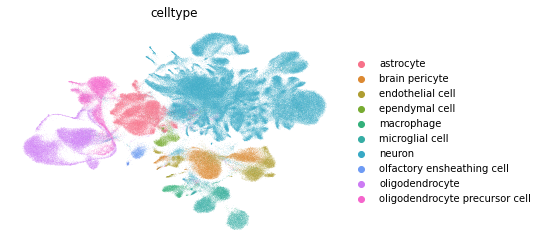

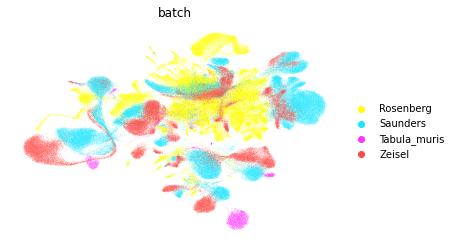

<Figure size 432x288 with 0 Axes>

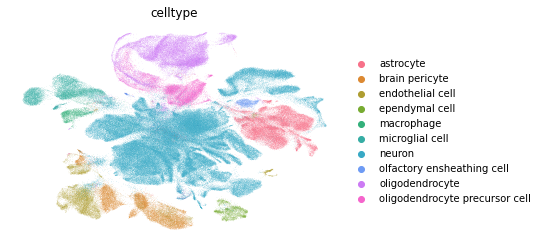

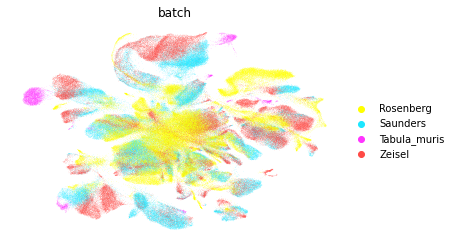

<Figure size 432x288 with 0 Axes>

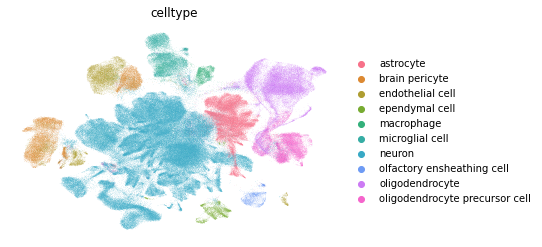

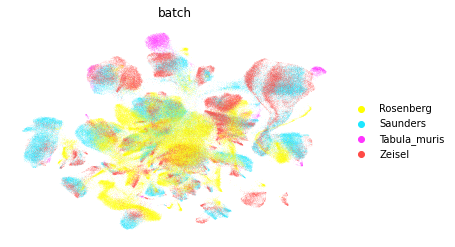

<Figure size 432x288 with 0 Axes>

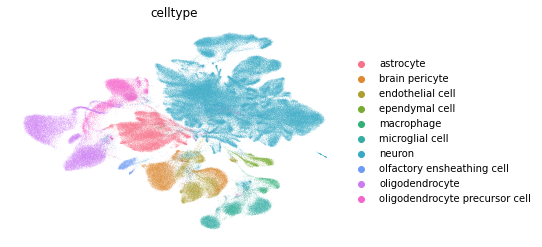

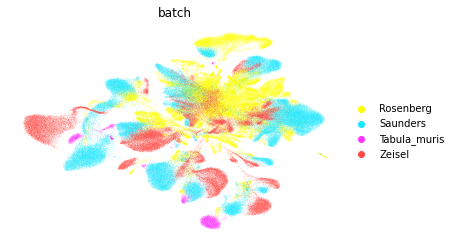

<Figure size 432x288 with 0 Axes>

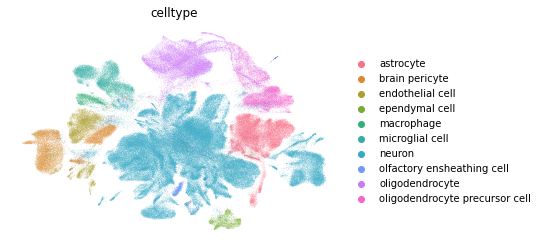

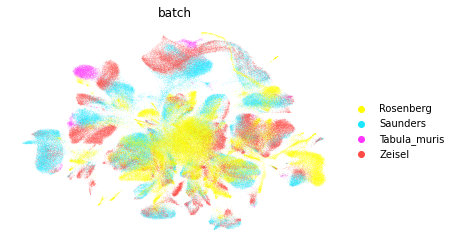

<Figure size 432x288 with 0 Axes>

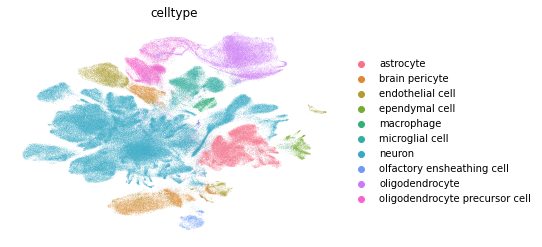

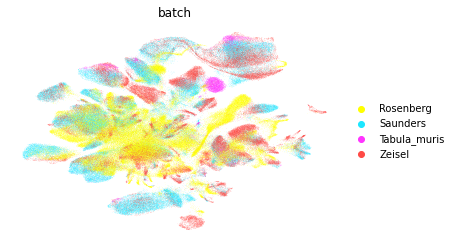

In [4]:
if figure == 1 or figure == 7 or figure == 5 or (figure == 0 and model == 'scvi'):
    test_nrs = [0]
if figure == 0:
    deep_conds = [True]
for deep_cond in deep_conds:
    for test_nr in test_nrs:
        if deep_cond:
            deep_label = "deep_cond"
        else:
            deep_label = "first_cond"
        if figure == 0:
            if model == 'scvi':
                if data == 'brain':
                    p_c = sns.color_palette("husl", 10)
                    p_b = sc.pl.palettes.godsnot_102
                if data == 'pancreas':
                    p_c = sns.color_palette("husl", 8)
                    p_b = sc.pl.palettes.godsnot_102
                dir_path = os.path.expanduser(f'~/Documents/benchmarking_adata/full_integration/{model}/{data}/')
                save_path = os.path.expanduser(f'~/Documents/benchmarking_umaps/full_integration/{model}/{data}/')
            else:
                if data == 'brain':
                    p_c = sns.color_palette("husl", 10)
                    p_b = sc.pl.palettes.godsnot_102
                if data == 'pancreas':
                    p_c = sns.color_palette("husl", 8)
                    p_b = sc.pl.palettes.godsnot_102
                dir_path = os.path.expanduser(f'~/Documents/benchmarking_adata/full_integration/{model}/{data}/label_ratio_{test_nr}/')
                save_path = os.path.expanduser(f'~/Documents/benchmarking_umaps/full_integration/{model}/{data}/label_ratio_{test_nr}/')
        if figure == 1:
            p_c = sns.color_palette("husl", 8)
            p_b = sc.pl.palettes.godsnot_102
            dir_path = os.path.expanduser(f'~/Documents/benchmarking_adata/figure_1/{model}/{deep_label}/')
            save_path = os.path.expanduser(f'~/Documents/benchmarking_umaps/figure_1/{model}/{deep_label}/')
        if figure == 2:
            p_c = sns.color_palette("husl", 10)
            p_b = sc.pl.palettes.godsnot_102
            dir_path = os.path.expanduser(f'~/Documents/benchmarking_adata/figure_2/{model}/{deep_label}/')
            save_path = os.path.expanduser(f'~/Documents/benchmarking_umaps/figure_2/{model}/{deep_label}/')
            if test_nr == 1:
                dir_path = f'{dir_path}reference/'
                save_path = f'{save_path}reference/'
            if test_nr == 2:
                dir_path = f'{dir_path}freezed_expr/'
                save_path = f'{save_path}freezed_expr/'
            if test_nr == 3:
                dir_path = f'{dir_path}freezed/'
                save_path = f'{save_path}freezed/'
            if test_nr == 4:
                dir_path = f'{dir_path}unfreezed/'
                save_path = f'{save_path}unfreezed/'
        elif figure == 3:
            if data == 'brain':
                p_c = sns.color_palette("husl", 10)
                p_b = sc.pl.palettes.godsnot_102
            if data == 'pancreas':
                p_c = sns.color_palette("husl", 8)
                p_b = sc.pl.palettes.godsnot_102
            dir_path = os.path.expanduser(f'~/Documents/benchmarking_adata/figure_3/{model}/{data}/test_{test_nr}_{deep_label}/')
            save_path = os.path.expanduser(f'~/Documents/benchmarking_umaps/figure_3/{model}/{data}/test_{test_nr}_{deep_label}/')
        elif figure == 4:
            dir_path = os.path.expanduser(f'~/Documents/benchmarking_adata/figure_4/{model}/test_{test_nr}_{deep_label}/')
            save_path = os.path.expanduser(f'~/Documents/benchmarking_umaps/figure_4/{model}/test_{test_nr}_{deep_label}/')
        elif figure == 5:
            p_c = sns.color_palette("husl", 16)
            p_b = sc.pl.palettes.godsnot_102
            dir_path = os.path.expanduser(f'~/Documents/benchmarking_adata/figure_5/{model}/ood_{ood_nr}_{deep_label}/')
            save_path = os.path.expanduser(f'~/Documents/benchmarking_umaps/figure_5/{model}/ood_{ood_nr}_{deep_label}/')
        elif figure == 6:
            p_c = sns.color_palette("husl", 16)
            p_b = sc.pl.palettes.godsnot_102
            dir_path = os.path.expanduser(f'~/Documents/benchmarking_adata/figure_6/{model}/test_{test_nr}_{deep_label}/')
            save_path = os.path.expanduser(f'~/Documents/benchmarking_umaps/figure_6/{model}/test_{test_nr}_{deep_label}/')
        elif figure == 7:
            dir_path = os.path.expanduser(f'~/Documents/benchmarking_adata/figure_7/{model}/{deep_label}/')
            save_path = os.path.expanduser(f'~/Documents/benchmarking_umaps/figure_7/{model}/{deep_label}/')
        
        if not os.path.exists(save_path):
            os.makedirs(save_path)
    
        adata_dict = dict()
        for file in os.listdir(dir_path):
            if file.endswith(".h5ad"):
                if "full_data" in file:
                    adata_dict[os.path.splitext(file)[0]] = sc.read(os.path.join(dir_path, file))

        for key, value in adata_dict.items():
            if figure == 1:
                if "full_1" in key:
                    custom_pl_ct = [p_c[0],p_c[7],p_c[1],p_c[2],p_c[3],p_c[4],p_c[5],p_c[6]]
                    custom_pl_batch = [p_b[0],p_b[1],p_b[3],p_b[2]]
                elif "full_2" in key:
                    custom_pl_ct = [p_c[0],p_c[7],p_c[1],p_c[2],p_c[3],p_c[4],p_c[5],p_c[6]]
                    custom_pl_batch = [p_b[0],p_b[4],p_b[1],p_b[3],p_b[2]]
                else:
                    custom_pl_ct = p_c
                    custom_pl_batch = p_b
            else:
                custom_pl_ct = p_c
                custom_pl_batch = p_b
                
                    
            sc.pp.neighbors(value)
            sc.tl.leiden(value)
            sc.tl.umap(value)
            plt.figure()
            if ct_umap:
                sc.pl.umap(
                    value,
                    color=["celltype"],
                    frameon=False,
                    ncols=1,
                    show=False,
                    palette=custom_pl_ct
                )
                plt.savefig(f'{save_path}{key}_umap_ct.png', bbox_inches='tight')
            if batch_umap:
                sc.pl.umap(
                    value,
                    color=["batch"],
                    frameon=False,
                    ncols=1,
                    show=False,
                    palette=custom_pl_batch
                )
                plt.savefig(f'{save_path}{key}_umap_batch.png', bbox_inches='tight')
            value.write_h5ad(filename=f'{save_path}{key}.h5ad')